In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#loaded required libraries

In [2]:
tele = pd.read_csv('D:\DataTrained Projects\Evaluation Projects\Week 3/Telecom_customer_churn.csv')
tele

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values in the dataset and we have different datatypes of float, integer and object

In [4]:
print(tele.shape)
print(tele.size)

(7043, 21)
147903


In [5]:
print(tele.isnull().values.any())
tele.isnull().sum()

False


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We could confirm that there are no null values in dataset

In [6]:
tele.drop(['customerID'],axis=1,inplace=True)

#dropped customer ID as it is having all unique values

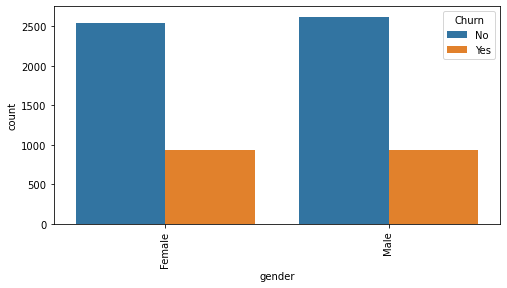

In [7]:
plt.figure(figsize=[8,4])
sns.countplot(x='gender',hue='Churn',data=tele)
plt.xticks(rotation = 90)
plt.show()

We can see that gender has no much impact on churn rates, as both male and female are almost equal

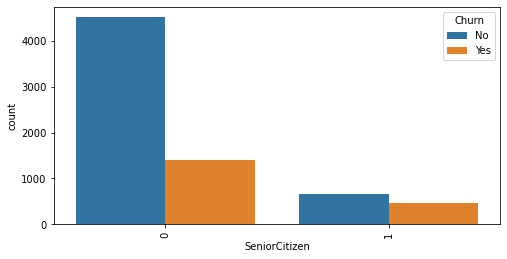

In [8]:
plt.figure(figsize=[8,4])
sns.countplot(x='SeniorCitizen',hue='Churn',data=tele)
plt.xticks(rotation = 90)
plt.show()

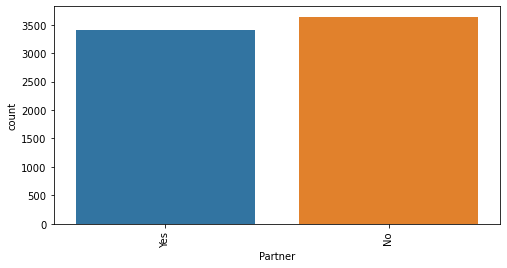

In [9]:
plt.figure(figsize=[8,4])
sns.countplot(x='Partner',data=tele)
plt.xticks(rotation = 90)
plt.show()

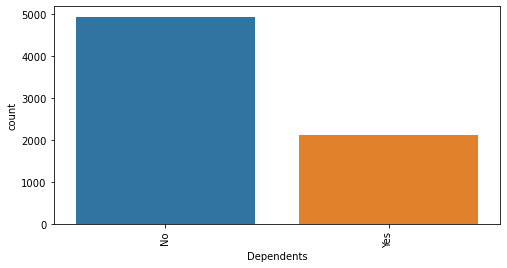

In [10]:
plt.figure(figsize=[8,4])
sns.countplot(x='Dependents',data=tele)
plt.xticks(rotation = 90)
plt.show()

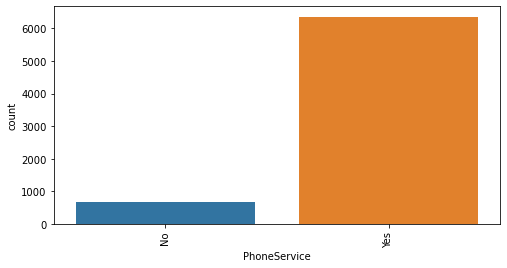

In [11]:
plt.figure(figsize=[8,4])
sns.countplot(x='PhoneService',data=tele)
plt.xticks(rotation = 90)
plt.show()

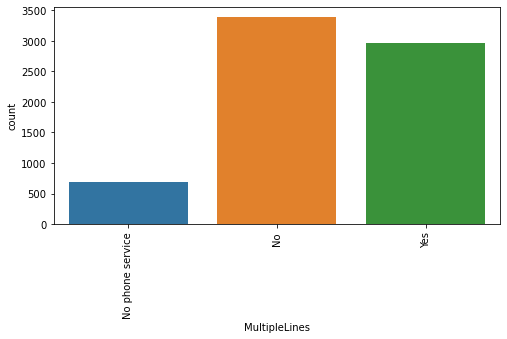

In [12]:
plt.figure(figsize=[8,4])
sns.countplot(x='MultipleLines',data=tele)
plt.xticks(rotation = 90)
plt.show()

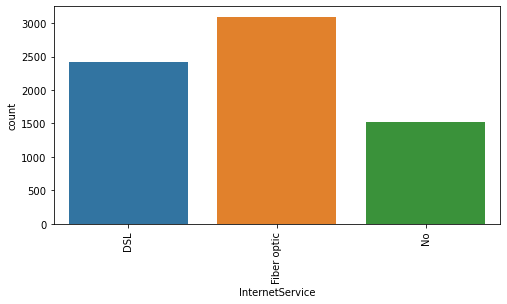

In [13]:
plt.figure(figsize=[8,4])
sns.countplot(x='InternetService',data=tele)
plt.xticks(rotation = 90)
plt.show()

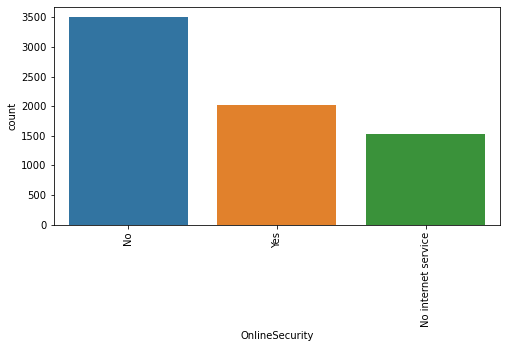

In [14]:
plt.figure(figsize=[8,4])
sns.countplot(x='OnlineSecurity',data=tele)
plt.xticks(rotation = 90)
plt.show()

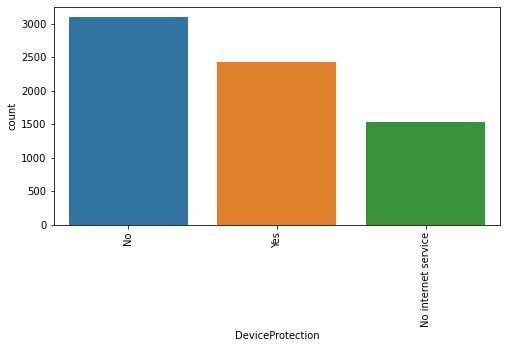

In [15]:
plt.figure(figsize=[8,4])
sns.countplot(x='DeviceProtection',data=tele)
plt.xticks(rotation = 90)
plt.show()

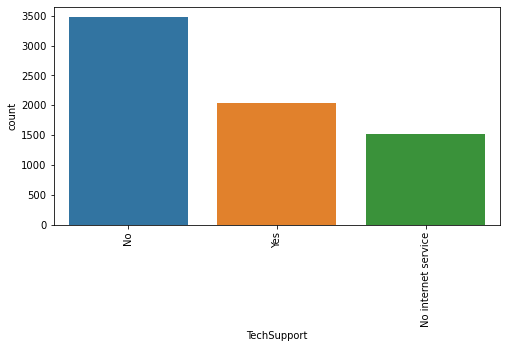

In [16]:
plt.figure(figsize=[8,4])
sns.countplot(x='TechSupport',data=tele)
plt.xticks(rotation = 90)
plt.show()

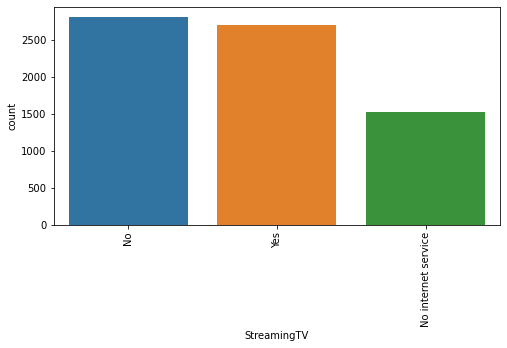

In [17]:
plt.figure(figsize=[8,4])
sns.countplot(x='StreamingTV',data=tele)
plt.xticks(rotation = 90)
plt.show()

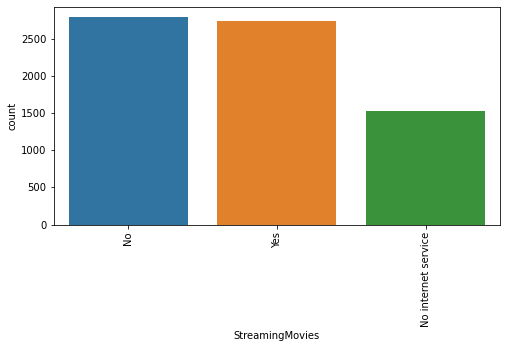

In [18]:
plt.figure(figsize=[8,4])
sns.countplot(x='StreamingMovies',data=tele)
plt.xticks(rotation = 90)
plt.show()

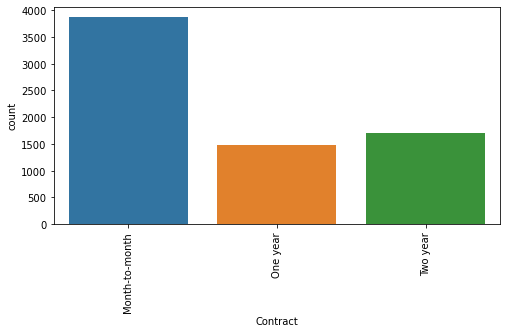

In [19]:
plt.figure(figsize=[8,4])
sns.countplot(x='Contract',data=tele)
plt.xticks(rotation = 90)
plt.show()

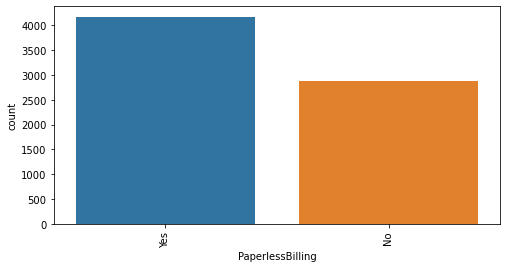

In [20]:
plt.figure(figsize=[8,4])
sns.countplot(x='PaperlessBilling',data=tele)
plt.xticks(rotation = 90)
plt.show()

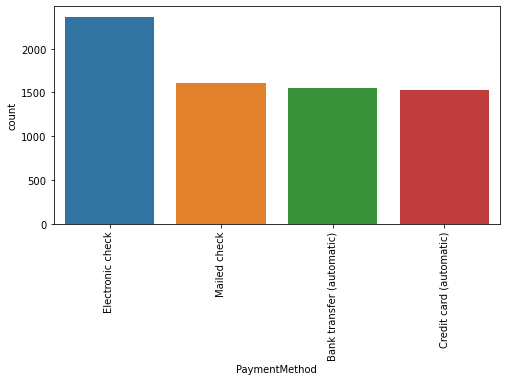

In [21]:
plt.figure(figsize=[8,4])
sns.countplot(x='PaymentMethod',data=tele)
plt.xticks(rotation = 90)
plt.show()

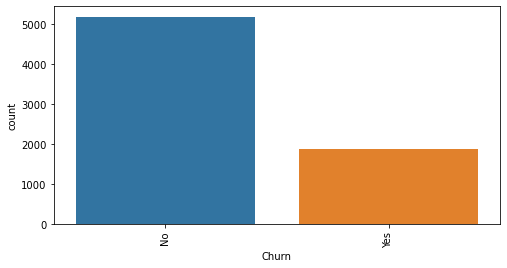

In [22]:
plt.figure(figsize=[8,4])
sns.countplot(x='Churn',data=tele)
plt.xticks(rotation = 90)
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tele['gender'] = le.fit_transform(tele['gender'])
tele['Partner'] = le.fit_transform(tele['Partner'])
tele['Dependents'] = le.fit_transform(tele['Dependents'])
tele['PhoneService'] = le.fit_transform(tele['PhoneService'])
tele['MultipleLines'] = le.fit_transform(tele['MultipleLines'])
tele['InternetService'] = le.fit_transform(tele['InternetService'])
tele['OnlineSecurity'] = le.fit_transform(tele['OnlineSecurity'])
tele['OnlineBackup'] = le.fit_transform(tele['OnlineBackup'])
tele['DeviceProtection'] = le.fit_transform(tele['DeviceProtection'])
tele['TechSupport'] = le.fit_transform(tele['TechSupport'])
tele['StreamingTV'] = le.fit_transform(tele['StreamingTV'])
tele['StreamingMovies'] = le.fit_transform(tele['StreamingMovies'])
tele['Contract'] = le.fit_transform(tele['Contract'])
tele['PaperlessBilling'] = le.fit_transform(tele['PaperlessBilling'])
tele['PaymentMethod'] = le.fit_transform(tele['PaymentMethod'])
tele['TotalCharges'] = le.fit_transform(tele['TotalCharges'])
tele['Churn'] = le.fit_transform(tele['Churn'])


Converted all categorial columns to numerical using label encoder

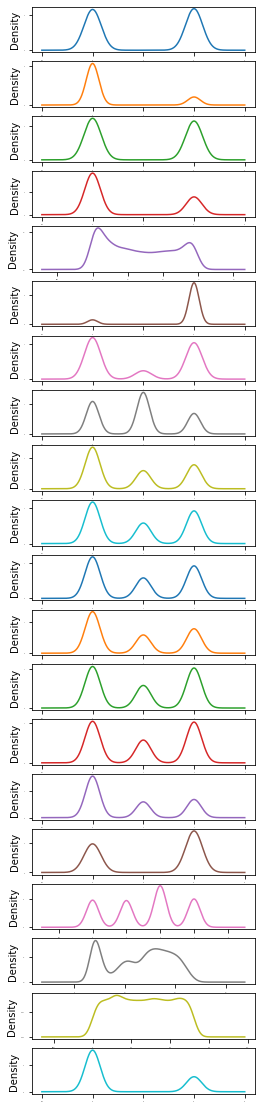

In [24]:
tele.plot(kind='density',subplots=True, sharex=False, legend=False, fontsize=1, figsize=[4,20])
plt.show()

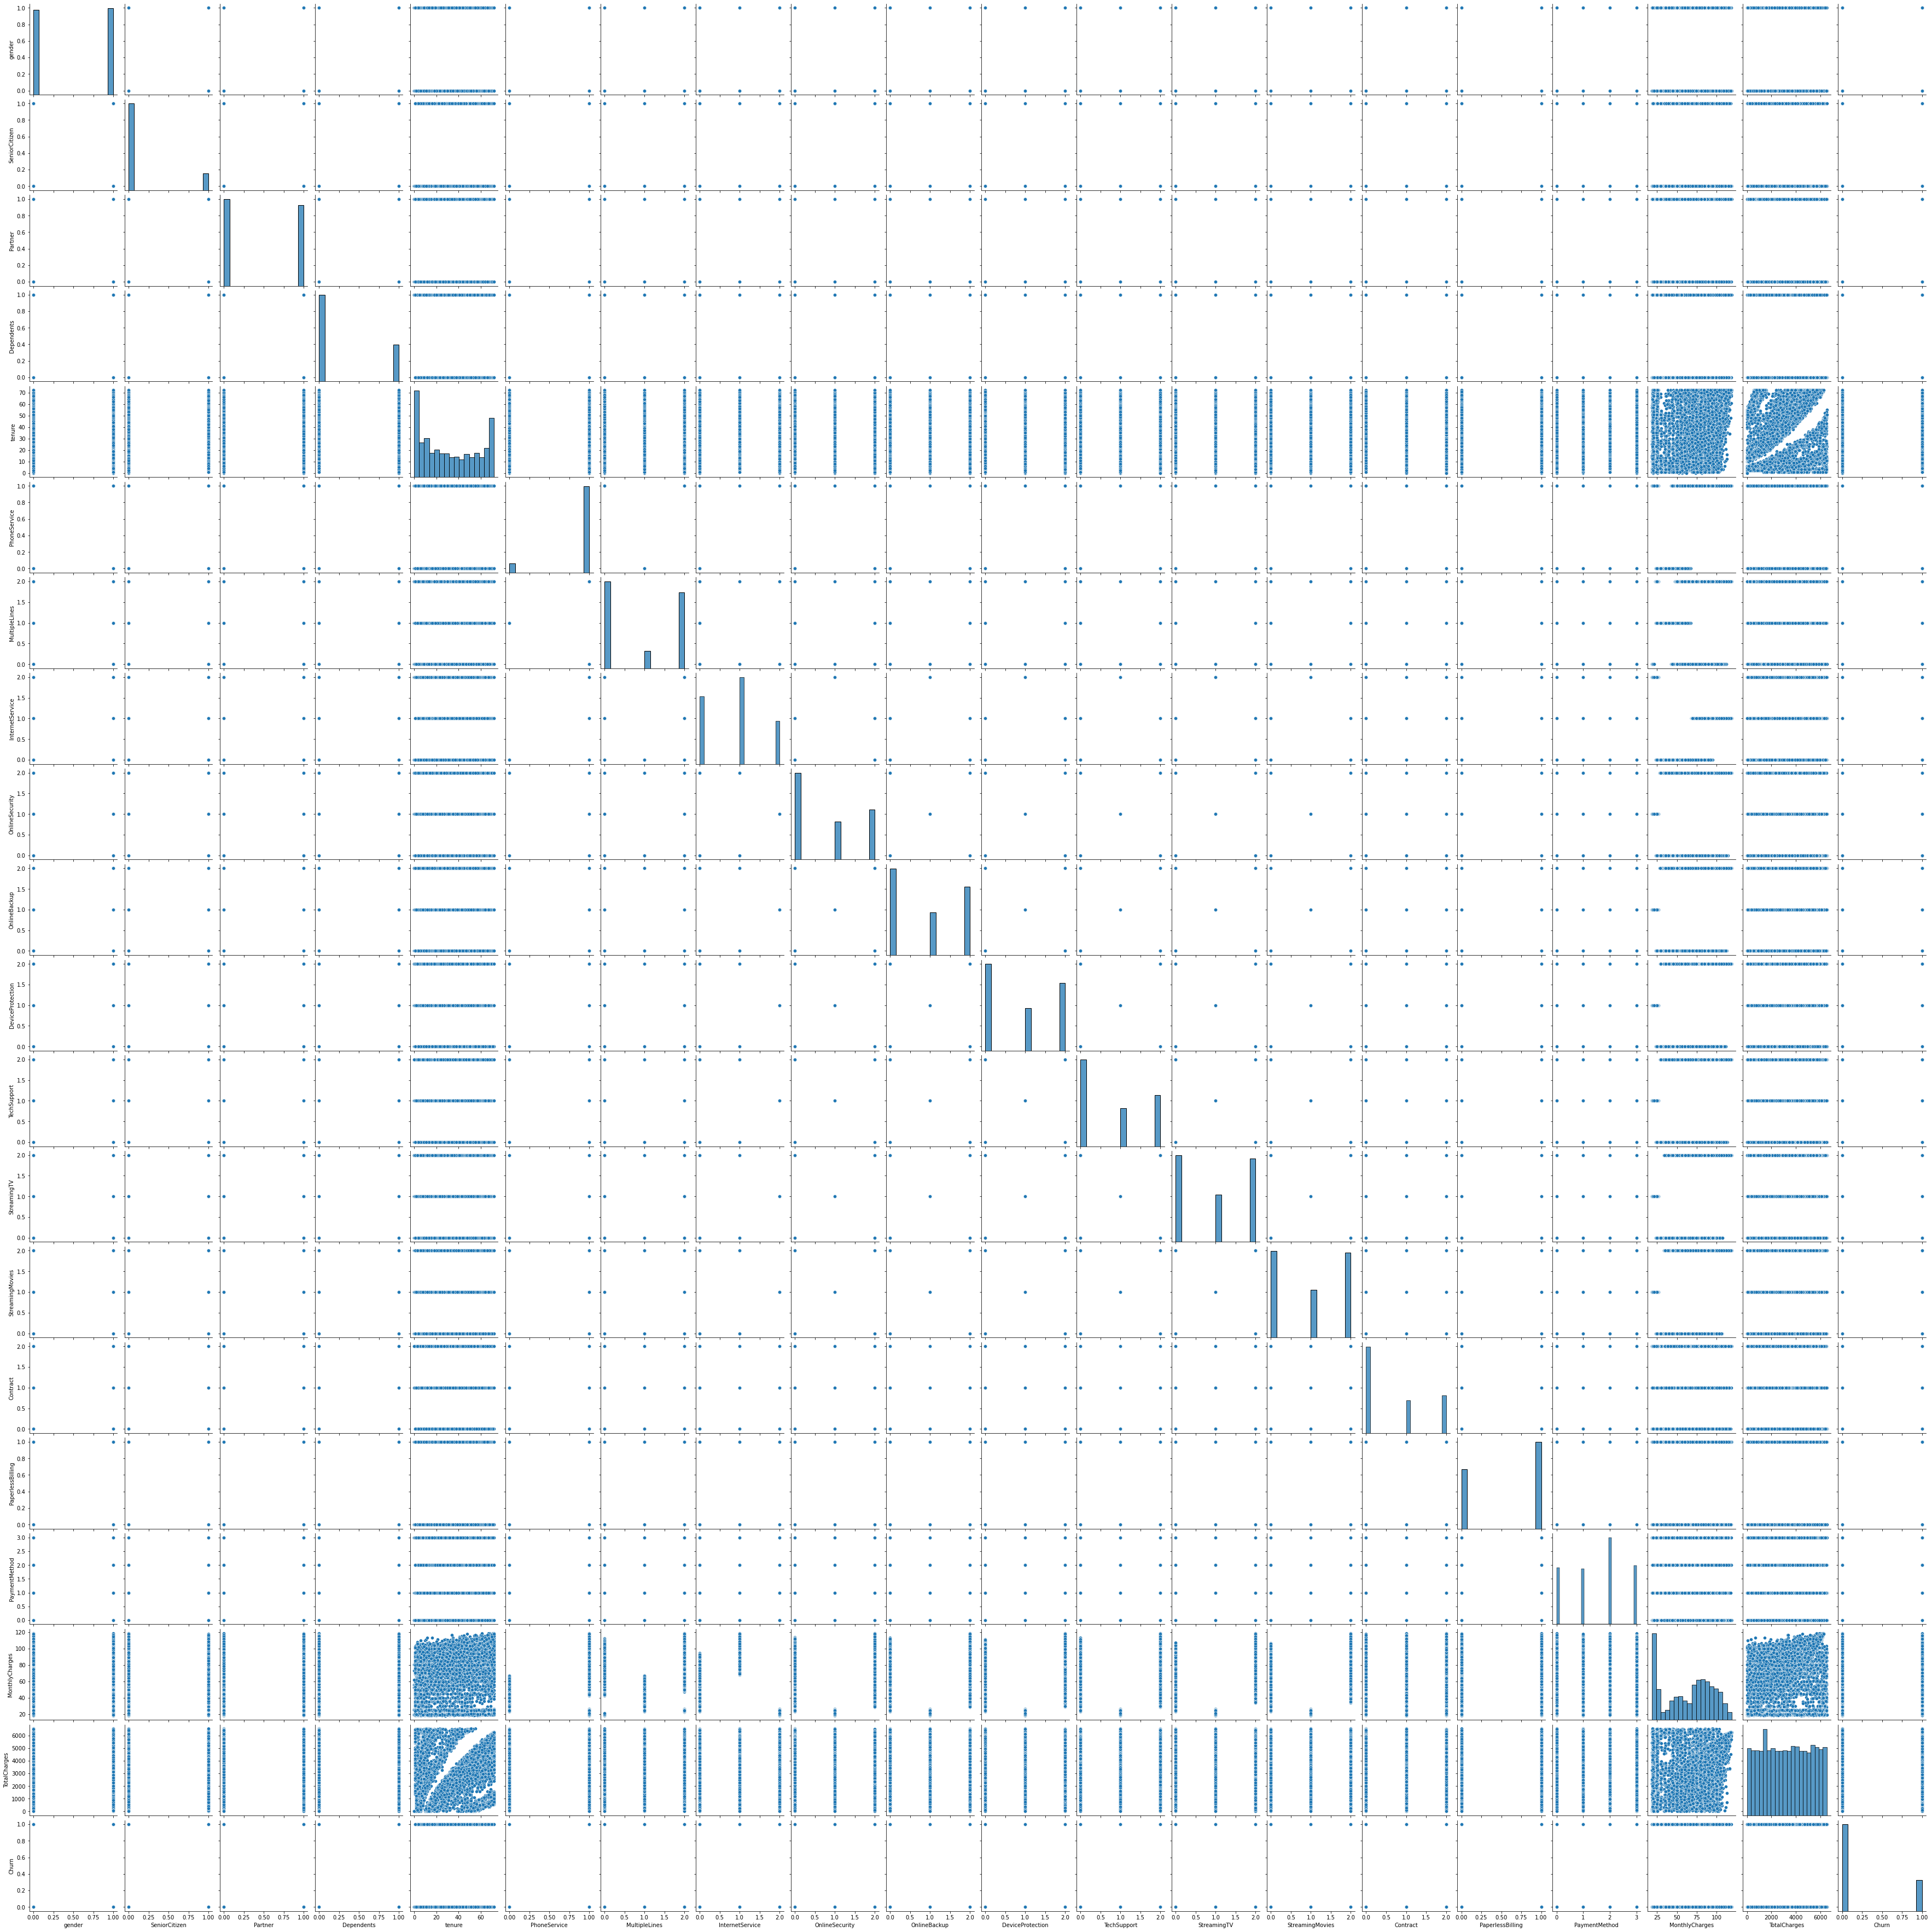

In [25]:
sns.pairplot(tele)
plt.show()

from density and pairplot we can see that there is no much skewness in dataset 

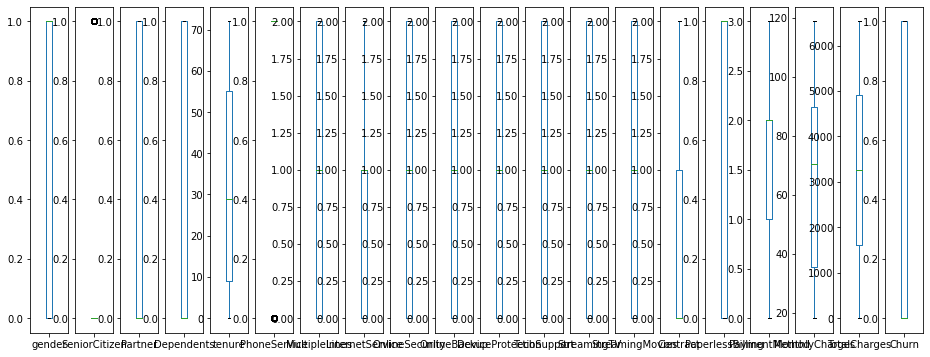

In [26]:
tele.plot(kind='box',subplots=True,figsize=[16,6])
plt.show()

There are few outliers in few columns that can be considered in dataset

In [27]:
corr_mat = tele.corr()
corr_mat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


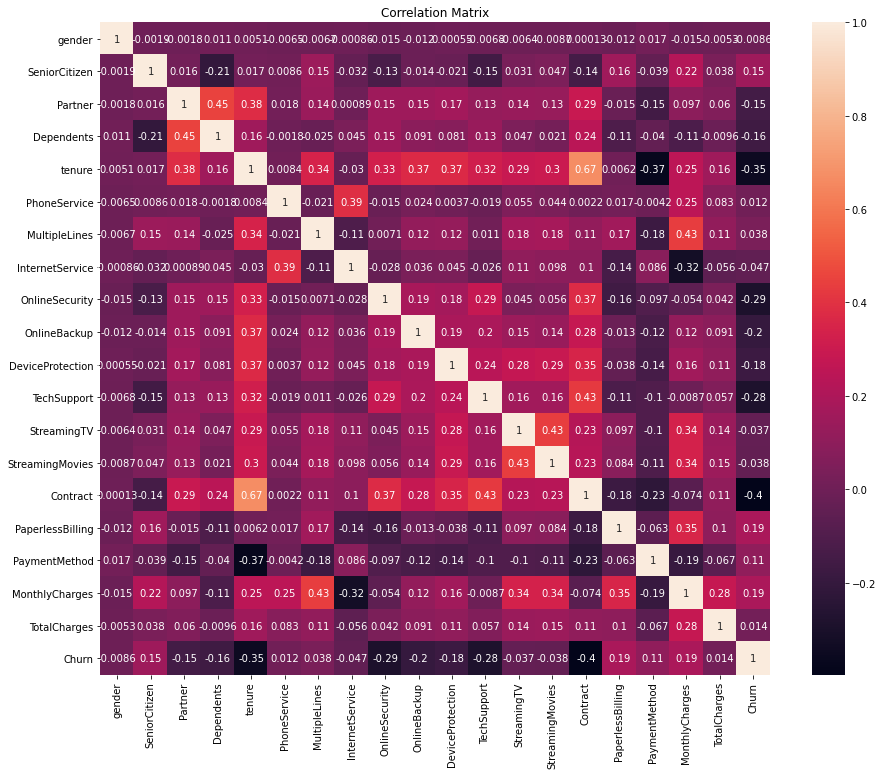

In [28]:
plt.figure(figsize=[15,12])
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [29]:
corr_target = tele.corrwith(tele['Churn'], axis=0)
corr_target

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges        0.014479
Churn               1.000000
dtype: float64

Contract and tenure are having strong relation with churn 

In [30]:
x = tele.drop('Churn', axis=1)
y = tele['Churn']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=15)

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_predict =lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predict)
print(lr_accuracy)

0.7927314026121521


In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)
print(gnb_accuracy_score)

0.7558205565019875


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_accuracy_score = accuracy_score(y_test,dt_predict)
print(dt_accuracy_score)

0.7495741056218058


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_accuracy_score = accuracy_score(y_test,rf_predict)
print(rf_accuracy_score)

0.7961385576377058


In [36]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=6)
print('Cross validation score of Logistic Regression : ',scr.mean())

Cross validation score of Logistic Regression :  0.801647711401673


In [37]:
scr=cross_val_score(gnb, x, y, cv=6)
print('Cross validation score of Naive Bayes : ',scr.mean())

Cross validation score of Naive Bayes :  0.7557863058316183


In [38]:
scr=cross_val_score(dt, x, y, cv=6)
print('Cross validation score of Decision Tree : ',scr.mean())

Cross validation score of Decision Tree :  0.7687090958646007


In [39]:
scr=cross_val_score(rf, x, y, cv=6)
print('Cross validation score of Random Forest Classifier : ',scr.mean())

Cross validation score of Random Forest Classifier :  0.8012223011318939


From all the above models Gaussian Naive Bayes model is having least difference between cross validation score and accuracy score, so we can choose Gaussian Naive Bayes model as best model.

In [40]:
import joblib
joblib.dump(gnb,'Telecom_customer_churn.pkl')

['Telecom_customer_churn.pkl']